# This notebook shows how to interact with the HTTP Target: 

As a simple example google search is used to show the interaction (this won't result in a successful search because of the anti-bot rules but shows how to use it in a simple case)

b'<!doctype html><html lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>apple - Google Search</title><script nonce="CcM7QwZMbLatRWIHeO9d4A">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a=c==="1"||c==="q"&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if(a.tagName==="A"){a=a.getAttribute("data-nohref")==="1";break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){window.google=window.google||{};var a=window.performance&&window.performance.timing&&"navigationStart"in window.performance.timing,b=google.stvsc&&google.stvsc.ns,c=a?b||window.performance.timing.navigationStart:void 0,d=google.stvsc&&google.stvsc.rs,f=a?d||window.p
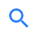
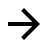
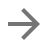
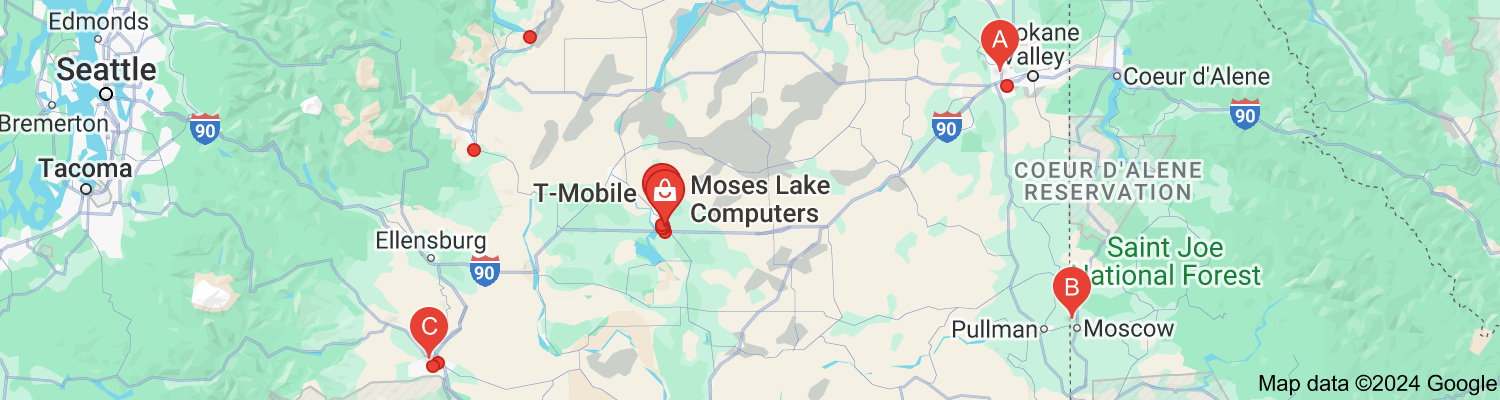
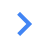
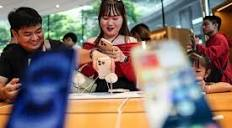
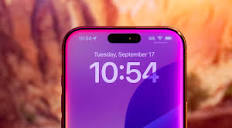
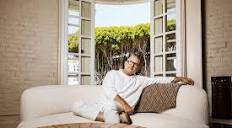
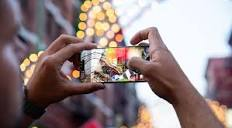
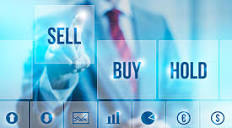
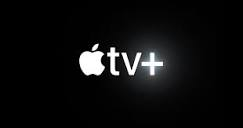
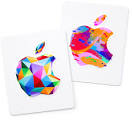
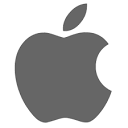
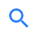
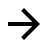
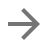
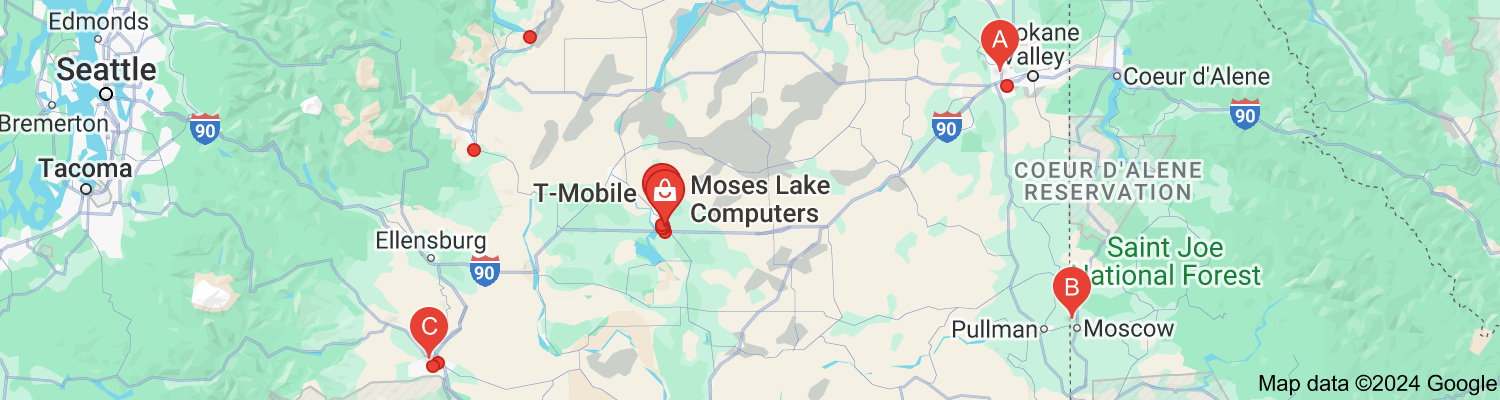
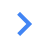
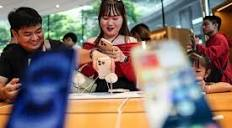
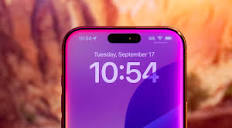
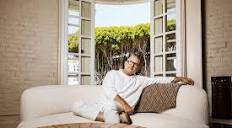
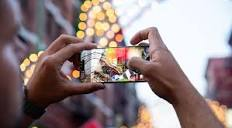
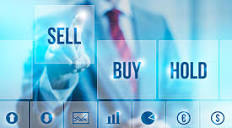
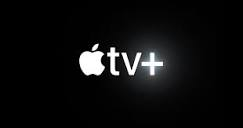
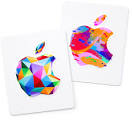
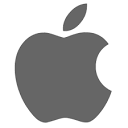

In [2]:
import os
import urllib.parse

from pyrit.models import PromptTemplate
from pyrit.orchestrator import PromptSendingOrchestrator
from pyrit.prompt_target import HTTPTarget
from pyrit.models import PromptRequestPiece


## Add the prompt you want to send to the URL
prompt = "apple"
url = "https://www.google.com/search?q={PROMPT}"
# Add the prompt to the body of the request

with HTTPTarget(http_request={}, url=url, body={}, url_encoding="url", body_encoding="+", method="GET") as target_llm:
    request = PromptRequestPiece(
        role="user",
        original_value=prompt,
    ).to_prompt_request_response()

    resp = await target_llm.send_prompt_async(prompt_request=request)  # type: ignore
    print(resp)
    

In [1]:
import os
import urllib.parse

from pyrit.models import PromptTemplate
from pyrit.orchestrator import PromptSendingOrchestrator
from pyrit.prompt_target import HTTPTarget
from pyrit.models import PromptRequestPiece

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


Bing Image Creator which does not have an API is harder to use

The HTTP request to make needs to be captured and put here in the "http_req" variable (the values you need to get from DevTools or Burp include the Cookie)

In [2]:
http_req = """
POST /images/create?q={PROMPT}&rt=4&FORM=GENCRE HTTP/2
Host: www.bing.com
Origin: https://www.bing.com
Content-Type: application/x-www-form-urlencoded
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.6613.120 Safari/537.36
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7
Sec-Fetch-Site: same-origin
Sec-Fetch-Mode: navigate
Sec-Fetch-User: ?1
Sec-Fetch-Dest: document
Referer: https://www.bing.com/images/create?FORM=GENILP

q={PROMPT}&qs=ds
"""

## Add the prompt you want to send to the URL
prompt = "apple"

response_var = None
with HTTPTarget(http_request=http_req, prompt_regex_string="{PROMPT}") as target_llm:
    # Questions: do i need to call converter on prompt before calling target? ie url encode rather than handling in target itself?
    request = PromptRequestPiece(
        role="user",
        original_value=prompt,
    ).to_prompt_request_response()

    resp = await target_llm.send_prompt_async(prompt_request=request)  # type: ignore
    response_var = resp

    

In [3]:
from bs4 import BeautifulSoup
html_content = response_var.request_pieces[0].original_value
parsed_hmtl_soup = BeautifulSoup(html_content, 'html.parser')

print(parsed_hmtl_soup.prettify())

#TODO: parse & turn this into a parsing function: as an example this is the image 
# <div data-c="/images/create/async/results/1-66f2fad6d7834081a343ac05ae3c1784?q=apple&amp;IG=52AE84FF96F948909718523E5DB8AF89&amp;IID=images.as" data-mc="/images/create/async/mycreation?requestId=1-66f2fad6d7834081a343ac05ae3c1784" data-nfurl="" id="gir">


b'
<!DOCTYPE html>
<html dir="ltr" lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:web="http://schemas.live.com/Web/">
 <script nonce="bZtQ9hpcpx+05aDcGLvQ7nc1+5XuP5dVICoNhmrbsto=" type="text/javascript">
  //<![CDATA[\r\nsi_ST=new Date\r\n//]]>
 </script>
 <head>
  <!--pc-->
  <title>
   apple - Image Creator in Bing
  </title>
  <meta content="Image Creator in Bing, AI image creation, Free AI image generator, text to image generator, generative image, generative AI, DALL-E" name="keywords"/>
  <meta content="Free, AI-powered text-to-image generator transforms your words into stunning visuals in seconds. Perfect for quick and easy image creation. Unleash your creativity with Image Creator in Bing!" name="description"/>
  <meta content="Bing Image Creator" property="og:site_name"/>
  <meta content="Bing Image Creator" property="og:title"/>
  <meta content="Free, AI-powered text-to-image generator transforms your words into stunning visuals in seconds. Perfect for qui

In [1]:
# Just same thing using orchestrator
http_prompt_target = HTTPTarget(http_request=http_resp, url=url, body=body)

with PromptSendingOrchestrator(prompt_target=http_prompt_target) as orchestrator:
    response = await orchestrator.send_prompts_async(prompt_list=[prompt])  # type: ignore
    print(response[0])

NameError: name 'HTTP_Target' is not defined